<a href="https://colab.research.google.com/github/Terrencekariuki/AI-Coursework-2025/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas and numpy and other codes for ploting graphs to be able to work on the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MALL CUSTOMERS DATASET

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data=pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


DATA CLEANING


In [4]:
data.dropna(inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

Choose one suitable feature from the dataset for clustering.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Extract the selected feature and prepare it for k-means clustering.


In [10]:
X = data[['Spending Score (1-100)']].values
display(X[:5])

array([[39],
       [81],
       [ 6],
       [77],
       [40]])

Apply the k-means algorithm to the data.


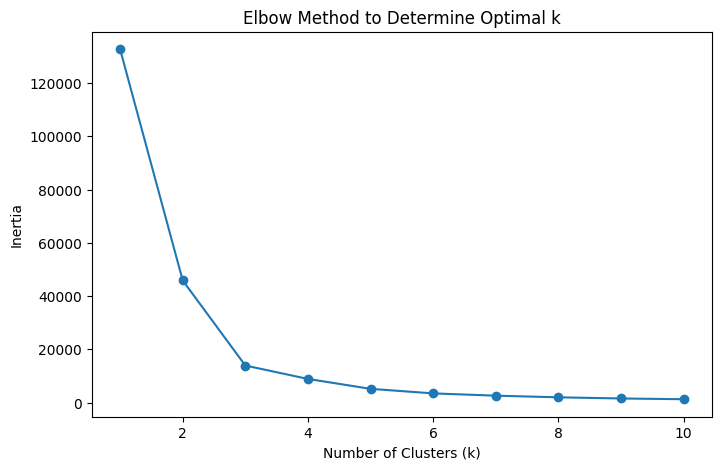

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [12]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# Based on the elbow plot, let's choose k=4 as a reasonable number of clusters.
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
data['cluster'] = kmeans.labels_
display(data.head())

Analyze the results of the clustering.


In [14]:
cluster_spending_stats = data.groupby('cluster')['Spending Score (1-100)'].agg(['mean', 'median', 'std']).reset_index()
print("Descriptive Statistics of Spending Score by Cluster:")
display(cluster_spending_stats)

Descriptive Statistics of Spending Score by Cluster:


,cluster,mean,median,std
0,0,53.317460,53.0,5.211109
1,1,82.350877,81.0,8.913255
2,2,37.195122,40.0,5.648980
3,3,11.846154,13.0,6.196512


Describe the key differences and similarities in spending scores across the identified clusters based on the calculated statistics.

Cluster 0: Customers spend moderately around 53, showing consistent average spending habits.

Cluster 1: Customers spend highly over 82, maintaining mostly consistent high spending.

Cluster 2: Customers spend low around 37, showing some consistency in spending.

Cluster 3: Customers spend very low around 12, with consistent low habits.



Visualize the clusters to understand the grouping.


Create a scatter plot to visualize the clusters based on 'Annual Income (k$)' and 'Spending Score (1-100)'.




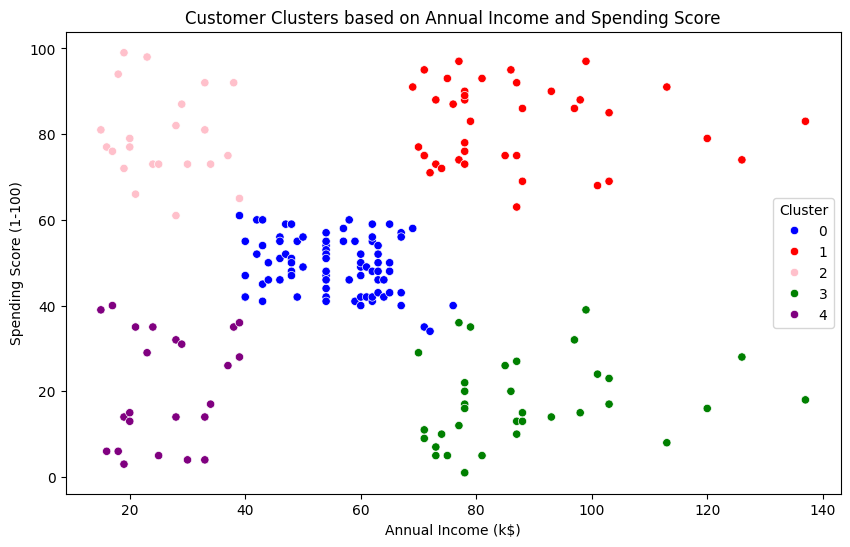

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=data, palette=['blue', 'red', 'pink', 'green', 'purple'])
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Choose two suitable features from the dataset for clustering.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


Extract the selected features and prepare them for k-means clustering.

Select Annual Income and Spending Score columns and store them in a variable X.

In [30]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
display(X[:3])

array([[15, 39],
       [15, 81],
       [16,  6]])

Use the elbow method to find the optimal number of clusters for the k-means algorithm.

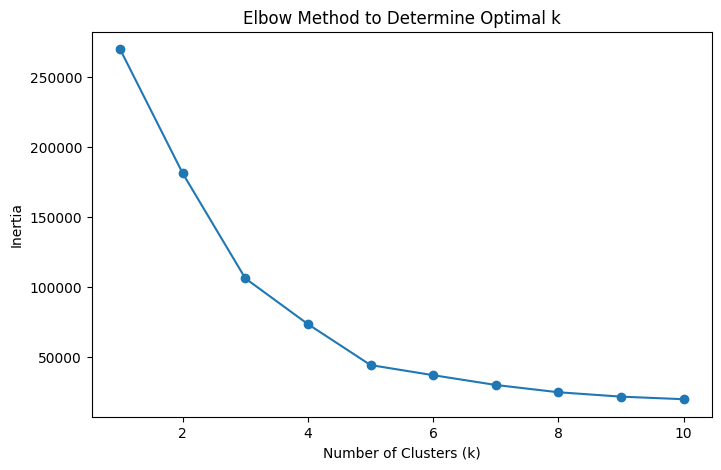

In [23]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

Apply the k-means algorithm to the data using the optimal number of clusters.

Apply the k-means algorithm to the data using the optimal number of clusters determined from the elbow plot and add the cluster labels to the dataframe.

In [24]:
# Based on the elbow plot, let's choose k=5 as a reasonable number of clusters.
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
data['cluster'] = kmeans.labels_
display(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Analyze the results of the clustering by examining the characteristics of each cluster based on the selected features.

 Group the data by cluster and calculate the mean and median of 'Annual Income (k$)' and 'Spending Score (1-100)' for each cluster.

In [31]:
cluster_stats = data.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'median']).reset_index()
print("Descriptive Statistics by Cluster:")
display(cluster_stats)

Descriptive Statistics by Cluster:


cluster Annual Income (k$)        Spending Score (1-100)       
                        mean median                   mean median
0       0          55.296296   54.0              49.518519   50.0
1       1          86.538462   79.0              82.128205   83.0
2       2          25.727273   24.5              79.363636   77.0
3       3          88.200000   85.0              17.114286   16.0
4       4          26.304348   25.0              20.913043   17.0

a scatter plot for the grouped data

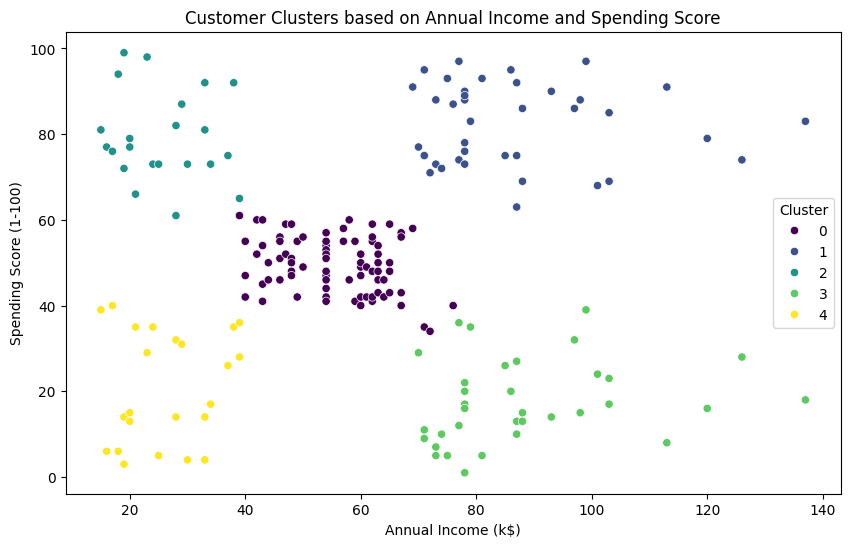

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=data, palette='viridis')
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()